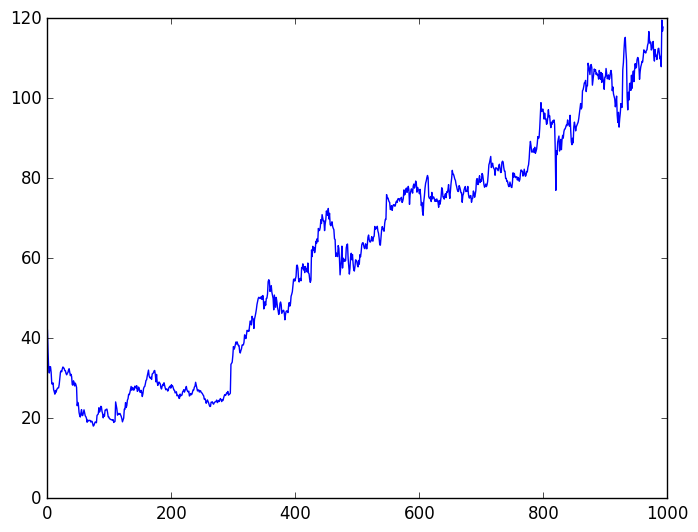

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x319e257d0>

In [3]:
using DataFrames
using PyPlot

df = readtable("../data/fb_daily_data.csv");
#Sort from oldest to most recent records
sort!(df,cols=size(df,1):1)

plot(df[:Open])



## MPT Formulation

Inputs:
The expected return for each asset
The standard deviation of each asset (a measure of risk)
The correlation matrix between these assets

Output:
The efficient frontier, i.e. the set of portfolios with expected return greater than any other with the same or lesser risk, and lesser risk than any other with the same or greater return.


In [ ]:
holdings = ["FB", "GOOG"]

std = [1]
expectedreturn = [10]
corr_matrix = 

# Tradeoff/Risk tolerance
λ=1;

m = Model();
@variable(m, weights[holdings] >=0)
@constraint(m, sum(weights) == 1);
@objective(m,Min,weights'*∑*weights - λ*R'*weights);


## Expected Return Estimate

### CER Model
http://faculty.washington.edu/ezivot/econ424/constantexpectedreturn.pdf

Essentially mean of past returns, really basic

In [13]:
for i in holdings
    returns = randn(10);
    n = length(returns);

    μ=sum(returns)/n;
    σ=sqrt(sum((returns-μ).*(returns-μ))/(n-1));
end


# COvariance
mm = mean(X,2)
for i in 1:size(X,2)
    X[:,i] = X[:,1]-mm
end
cov = (1/size(X,2))*X*(X')

# MPT
# CER
# Models for ARMA, ARCH

-0.07623331983474183
0.9661869585907618


## ARCH

In [ ]:
k = 1
u = raw[:,1];
y = raw[:,2];
T = size(u)[1]

U = zeros(T,k)
for i = 1:k
    U[i:end, i] = u[1:end-(i-1)]
end
Y = zeros(T,k)
for i = 1:k
    Y[i+1:end,i] = y[1:end-i]
end

# LEast squares solver
m = Model()
@defVar( m, a[1:k] )
@defVar( m, b[1:k])
@setObjective( m, Min, sum((U*b+Y*a-y).^2) )
solve(m)

#Get y hat of ARMA
a_val = getValue(a)
b_val = getValue(b)
yhat = U*b_val + Y*a_val


## GARCH

In [ ]:
#Forecast error
ϵ=[1,2,3]


## CAPM
http://www.columbia.edu/~ks20/FE-Notes/4700-07-Notes-CAPM.pdf

Reference
https://quantquote.com/historical-stock-data